#### Block 0A:  Import general purpose packages for ease of use and improved performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#### Block 0B:  Import packages for a typical deep learning workflow using TensorFlow and Keras. Import the MNIST image dataset, the IMDB movie review dataset, and the California housing market dataset from Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#### Block 1:  Load the images in the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database, rescale intensities from 0 to 255 to 0 to 1, divide the original training dataset into a training dataset and validation dataset, and display a sample of images from the training dataset.

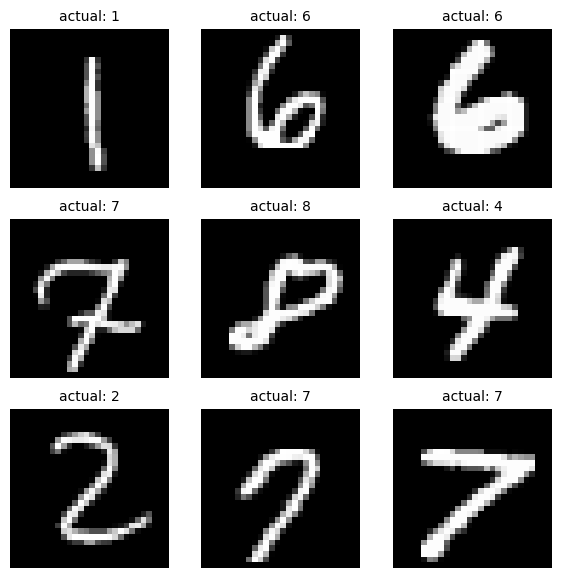

In [4]:
## Load the MNIST dataset of handwritten digits
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values from the range 0–255 to the range 0–1
X_train, X_test = X_train/255, X_test/255

# Split the training data into a smaller training set and a validation set
# The validation set helps us monitor how well the model is learning during training
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  random_state=42)

# Show the first 9 images from the training set
# This helps us visually check that the data was loaded and scaled correctly
fig, axs = plt.subplots(3, 3)
fig.set_size_inches((7, 7))
for i in range(3):
    for j in range(3):
        title = f'actual: {y_train[i*3+j]}'
        axs[i,j].imshow(X_train[i*3+j], cmap='gray')
        axs[i,j].set_title(title, fontsize=10)
        axs[i,j].axis('off')
fig.show()

#### Block 2:  Scale an interval.

In [6]:
# Ask the user for a contrast reduction factor (must be between 0 and 1)
sf = float(input('Enter the contrast reduction factor:  '))

# Define the interval endpoints and midpoint (replace with desired values)
x1 = 0  # Example: lower bound of the interval
x2 = 1  # Example: upper bound of the interval
xmidpt = (x1 + x2) / 2  # Midpoint of the interval

if sf <= 0 or sf >= 1:
    print(f'{sf} is out of range.')
else:
    # Shrink the interval by scaling it around the midpoint
    x1new = sf * (x1 - xmidpt) + xmidpt
    x2new = sf * (x2 - xmidpt) + xmidpt

    # Calculate the new range and midpoint
    range_new = x2new - x1new
    midpt_new = (x1new + x2new) / 2

    # Show the new interval values
    print(f'Shrunk interval: x1 = {x1new}, x2 = {x2new}, range = {range_new}, midpoint = {midpt_new}')


# After shrinking, the interval has endpoints x1 = 0.25, x2 = 0.75, range 0.5, and midpoint = 0.5
# This shows how reducing the contrast brings the pixel values closer together.

Enter the contrast reduction factor:  .5
Shrunk interval: x1 = 0.25, x2 = 0.75, range = 0.5, midpoint = 0.5


#### Block 3:  Implement and test a function to reduce contrast of a grayscale image.

Enter the constrast reduction factor:  .2


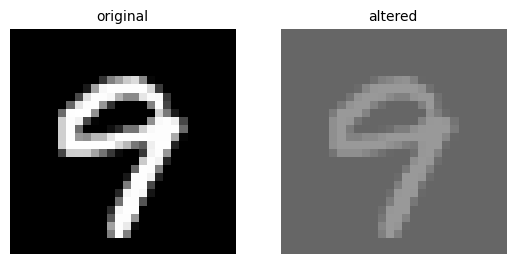

In [12]:
# Choose a random image from the training set to test the contrast reduction
rng = np.random.default_rng()
idx = rng.choice(len(X_train))
img = X_train[idx]

# Find the minimum and maximum pixel values in the selected image
# Then calculate the midpoint to use for contrast scaling
px_min, px_max = np.min(img), np.max(img)
px_midpt = (px_max + px_min) / 2

# Ask the user for a contrast reduction factor (between 0 and 1)
# Then apply the contrast scaling transformation
sf = float(input('Enter the constrast reduction factor:  '))
if sf <= 0 or sf >= 1:
    print(f'{sf} is out of range.')
else:
    # Subtract midpoint to center values around 0, apply scale factor, then add midpoint back
    dim_img = sf * (img - px_midpt) + px_midpt

    # Display the original and contrast-reduced images side by side
    fig, axs = plt.subplots(1, 2)
    for i, (title, img_cf) in enumerate(zip(('original', 'altered'), (img, dim_img))):
        axs[i].set_title(title, fontsize=10)
        axs[i].imshow(img_cf, cmap='gray', vmin=0, vmax=1)  # Keep grayscale and scale fixed
        axs[i].axis('off')
    fig.show()

# This block shows how contrast reduction affects a grayscale image visually.
# A lower scale factor (like 0.2) makes the image appear faded.

#### Block 4:  Reduce the contrast of all the images in the MNIST dataset.

Enter the contrast reduction factor: .2


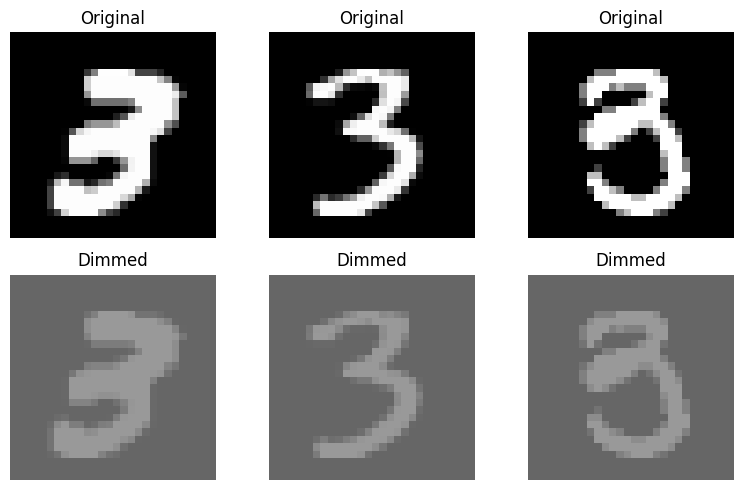

In [15]:
# Ask the user to enter a contrast reduction factor (must be a number between 0 and 1)
sf = float(input("Enter the contrast reduction factor: "))

# Check if the input is valid — must be greater than 0 and less than 1
if sf <= 0 or sf >= 1:
    print(f"{sf} is out of range.")
else:
    # Find the minimum and maximum pixel values in the entire training set
    # These help us calculate the midpoint for the contrast reduction formula
    px_min = np.min(X_train)
    px_max = np.max(X_train)
    px_midpt = (px_min + px_max) / 2

    # Apply the contrast reduction formula to all images in the training and test sets
    # This reduces contrast by moving all pixel values closer to the midpoint
    X_train_dim = sf * (X_train - px_midpt) + px_midpt
    X_test_dim = sf * (X_test - px_midpt) + px_midpt

    # Set up a 2x3 grid to display 3 original and 3 dimmed images for comparison
    fig, axs = plt.subplots(2, 3, figsize=(8, 5))

    # Choose 3 random image indices from the training set
    rng = np.random.default_rng()
    for i in range(3):
        idx = rng.integers(len(X_train))  # Pick a random index

        # Top row: show the original image
        axs[0, i].imshow(X_train[idx], cmap='gray', vmin=0, vmax=1)
        axs[0, i].set_title("Original")
        axs[0, i].axis('off')  # Hide axis ticks

        # Bottom row: show the dimmed (contrast-reduced) image
        axs[1, i].imshow(X_train_dim[idx], cmap='gray', vmin=0, vmax=1)
        axs[1, i].set_title("Dimmed")
        axs[1, i].axis('off')

    # Adjust layout and display the plot
    fig.tight_layout()
    plt.show()

#### Block 5:  Define and compile the model.

In [16]:
# Define a simple neural network model using Keras Sequential API
model = keras.Sequential([
    # Flatten the 28x28 image into a 1D array of 784 pixels
    layers.Flatten(input_shape=(28, 28)),

    # Hidden layer with 100 neurons and ReLU activation function
    layers.Dense(100, activation='relu'),

    # Output layer with 10 neurons (one for each digit 0–9), using softmax for probabilities
    layers.Dense(10, activation='softmax')
])

# Compile the model: choose optimizer, loss function, and what metric to track
model.compile(
    optimizer='adam',                  # Efficient optimizer that works well in practice
    loss='sparse_categorical_crossentropy',  # Good for multi-class classification with integer labels
    metrics=['accuracy']               # Track accuracy during training and testing
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Block 6:  Train the model.

In [17]:
# Train the model using the contrast-reduced training images and the original labels
# Use the validation set to check accuracy after each epoch

history = model.fit(
    X_train_dim, y_train,           # Training data (images + labels)
    validation_data=(X_val, y_val), # Validation data to monitor during training
    epochs=10,                      # Number of training cycles over the entire dataset
    batch_size=32,                  # Number of samples per update step
    verbose=2                       # Print one line per epoch
)

Epoch 1/10
1688/1688 - 7s - 4ms/step - accuracy: 0.6026 - loss: 1.3463 - val_accuracy: 0.6300 - val_loss: 1.4828
Epoch 2/10
1688/1688 - 5s - 3ms/step - accuracy: 0.8193 - loss: 0.6273 - val_accuracy: 0.7058 - val_loss: 1.4262
Epoch 3/10
1688/1688 - 6s - 3ms/step - accuracy: 0.8532 - loss: 0.4981 - val_accuracy: 0.7265 - val_loss: 1.4093
Epoch 4/10
1688/1688 - 6s - 3ms/step - accuracy: 0.8683 - loss: 0.4477 - val_accuracy: 0.7227 - val_loss: 1.4728
Epoch 5/10
1688/1688 - 5s - 3ms/step - accuracy: 0.8805 - loss: 0.4124 - val_accuracy: 0.7342 - val_loss: 1.4226
Epoch 6/10
1688/1688 - 6s - 4ms/step - accuracy: 0.8848 - loss: 0.3944 - val_accuracy: 0.7303 - val_loss: 1.4894
Epoch 7/10
1688/1688 - 11s - 6ms/step - accuracy: 0.8881 - loss: 0.3800 - val_accuracy: 0.7435 - val_loss: 1.4177
Epoch 8/10
1688/1688 - 9s - 5ms/step - accuracy: 0.8901 - loss: 0.3743 - val_accuracy: 0.7527 - val_loss: 1.3785
Epoch 9/10
1688/1688 - 6s - 4ms/step - accuracy: 0.8924 - loss: 0.3617 - val_accuracy: 0.7573 -

#### Block 7: Assess the performance of the model and plot the training history as accuracy vs epoch.

313/313 - 1s - 2ms/step - accuracy: 0.9005 - loss: 0.3438

Test accuracy on dimmed images: 0.9005


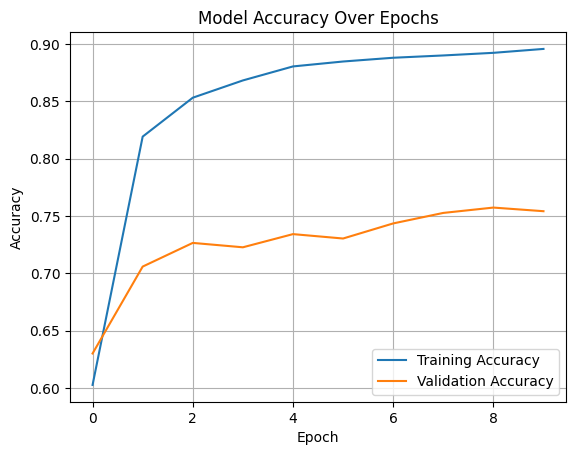

In [18]:
# Evaluate how well the model performs on the dimmed test set
test_loss, test_accuracy = model.evaluate(X_test_dim, y_test, verbose=2)
print(f"\nTest accuracy on dimmed images: {test_accuracy:.4f}")

# Plot training and validation accuracy from the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Block 8:  Predict digits for images in the testing dataset and display a small selection of the predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


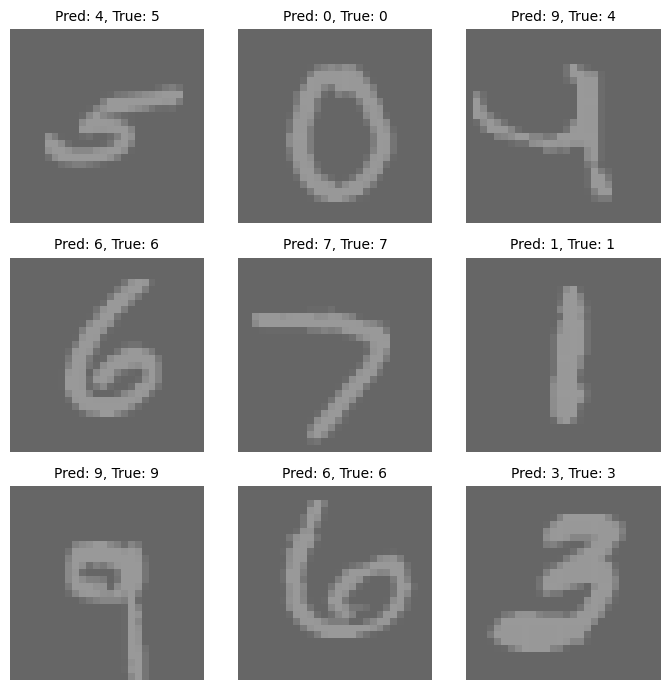

In [19]:
# Use the trained model to make predictions on the dimmed test images
predictions = model.predict(X_test_dim)

# Get the predicted digit for each image (the index of the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Display 9 random test images with their predicted and true labels
fig, axs = plt.subplots(3, 3, figsize=(7, 7))
rng = np.random.default_rng()

for i in range(3):
    for j in range(3):
        idx = rng.integers(len(X_test_dim))  # Pick a random test image

        # Show the image
        axs[i, j].imshow(X_test_dim[idx], cmap='gray', vmin=0, vmax=1)

        # Set title with predicted and actual labels
        title = f'Pred: {predicted_labels[idx]}, True: {y_test[idx]}'
        axs[i, j].set_title(title, fontsize=10)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()
